In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

class LinearRegression:
  def __init__(self, X_data, y_target, learning_rate = 0.01, num_epochs = 10000):
    self.X_data = X_data
    self.y_target = y_target
    self.learning_rate = learning_rate
    self.num_epochs = num_epochs
    self.num_samples = self.X_data.shape[0]
    #self.theta = np.random.randn(4,1)
    self.theta = np.random.randn(self.X_data.shape[1])
    self.losses = []

  def compute_loss(self, y_predict, y_target):
    loss = (y_predict - y_target) * (y_predict - y_target) / 2
    return np.mean(loss)

  def predict(self, X_data):
    y_predict = X_data.dot(self.theta)
    return y_predict

  def fit(self):
    for i in range(self.num_epochs):
      y_hat = self.predict(self.X_data)
      loss = self.compute_loss(y_hat, self.y_target)
      self.losses.append(loss)

      k = (y_hat-self.y_target)
      gradients = np.mean(self.X_data.T.dot(k))

      # update weight
      self.theta = self.theta - self.learning_rate * gradients


      # print(f'Epoch: {i}  Loss: {loss}  Theta: {self.theta}')

    return {'weights': self.theta, 'loss': np.mean(self.losses)}

In [3]:
def compute_R2score(y_predict, y_target):
  numerator = (y_target - y_predict).dot(y_target - y_predict)
  denominator = (y_target - np.mean(y_target)).dot(y_target - np.mean(y_target))
  return 1 - numerator / denominator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


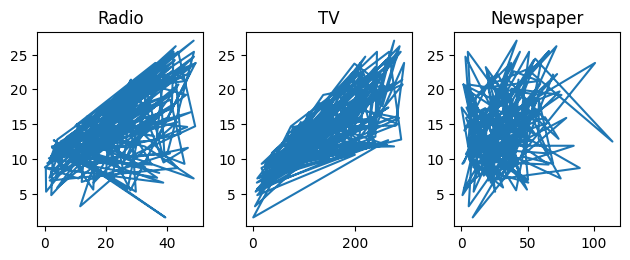

In [6]:
x1 = df.TV
x2 = df.Radio
x3 = df.Newspaper
y = df.Sales

plot1 = plt.subplot2grid((2, 3), (0, 0))
plot2 = plt.subplot2grid((2, 3), (0, 1))
plot3 = plt.subplot2grid((2, 3), (0, 2))

plot2.plot(x1, y)
plot2.set_title('TV')

plot1.plot(x2, y)
plot1.set_title('Radio')

plot3.plot(x3, y)
plot3.set_title('Newspaper')

# Packing all the plots and displaying them
plt.tight_layout()
plt.show()

In [7]:
df.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

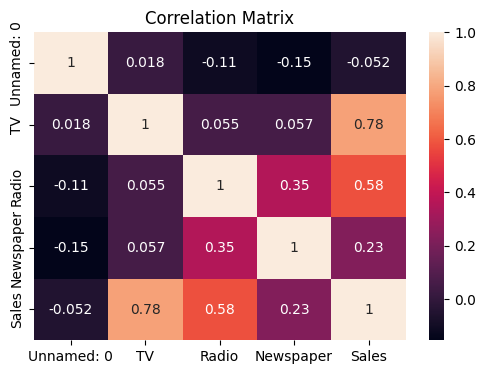

In [8]:
plt.rcParams["figure.figsize"] = (6,4)
sns.heatmap(df.corr(), annot =True)
plt.title('Correlation Matrix')

In [11]:
X = df[['TV', 'Radio', 'Newspaper']]
X = X.values
X = np.hstack((np.ones((X.shape[0], 1)), X))
X

array([[  1. , 230.1,  37.8,  69.2],
       [  1. ,  44.5,  39.3,  45.1],
       [  1. ,  17.2,  45.9,  69.3],
       [  1. , 151.5,  41.3,  58.5],
       [  1. , 180.8,  10.8,  58.4],
       [  1. ,   8.7,  48.9,  75. ],
       [  1. ,  57.5,  32.8,  23.5],
       [  1. , 120.2,  19.6,  11.6],
       [  1. ,   8.6,   2.1,   1. ],
       [  1. , 199.8,   2.6,  21.2],
       [  1. ,  66.1,   5.8,  24.2],
       [  1. , 214.7,  24. ,   4. ],
       [  1. ,  23.8,  35.1,  65.9],
       [  1. ,  97.5,   7.6,   7.2],
       [  1. , 204.1,  32.9,  46. ],
       [  1. , 195.4,  47.7,  52.9],
       [  1. ,  67.8,  36.6, 114. ],
       [  1. , 281.4,  39.6,  55.8],
       [  1. ,  69.2,  20.5,  18.3],
       [  1. , 147.3,  23.9,  19.1],
       [  1. , 218.4,  27.7,  53.4],
       [  1. , 237.4,   5.1,  23.5],
       [  1. ,  13.2,  15.9,  49.6],
       [  1. , 228.3,  16.9,  26.2],
       [  1. ,  62.3,  12.6,  18.3],
       [  1. , 262.9,   3.5,  19.5],
       [  1. , 142.9,  29.3,  12.6],
 

In [10]:
y = df['Sales']
y = y.values
y

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 12.5,
        5.6, 15.5,  9.7, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,
       17.4,  9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9,
        8.5, 14.9, 10.6, 23.2, 14.8,  9.7, 11.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 15.7, 14. , 18. ,  9.3,
        9.5, 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 12.3, 11.3, 13.6, 21.7, 15.2, 12. , 16. ,
       12.9, 16.7, 11.2,  7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5, 25.4,
       17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2,  7.2,  8.7,  5.3, 19.8,
       13.4, 21.8, 14.1, 15.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 11.6, 15.2, 19.7, 10.6,  6.6,  8.8, 24.7,  9.7,  1.6, 12.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16

In [12]:
def mean_normalization(X):
  N = len(X)
  maxi = np.max(X)
  mini = np.min(X)
  avg = np.mean(X)
  X = (X-avg) / (maxi -mini)
  X_b = np.c_[np.ones((N, 1)), X]
  return X_b , maxi , mini , avg

X_b, maxi, mini, avg = mean_normalization(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)

In [18]:
#k-fold cross validation
k = 5
step_fold = int(X_train.shape[0]/k)

x_fold1 = X_train[:step_fold,:]
y_fold1 = y_train[:step_fold]

x_fold2 = X_b[step_fold:2*step_fold,:]
y_fold2 = y_train[step_fold:2*step_fold]

x_fold3 = X_train[2*step_fold:3*step_fold,:]
y_fold3 = y_train[2*step_fold:3*step_fold]

x_fold4 = X_train[3*step_fold:4*step_fold,:]
y_fold4 = y_train[3*step_fold:4*step_fold]

x_fold5 = X_train[4*step_fold:,:]
y_fold5 = y_train[4*step_fold:]

#Cross validation 1
cr_x_train_1 = np.r_[x_fold1, x_fold2, x_fold3, x_fold4]
cr_y_train_1 = np.r_[y_fold1, y_fold2, y_fold3, y_fold4]
cr_x_test_1 = x_fold5
cr_y_test_1 = y_fold5
linear_model1 = LinearRegression(cr_x_train_1, cr_y_train_1, num_epochs = 100000, learning_rate = 0.0001)
linear_model1.fit()
y_predict1 = linear_model1.predict(cr_x_test_1)
print("RMS for cross validation 1:", compute_R2score(y_predict1, cr_y_test_1))

#Cross validation 2
cr_x_train_2 = np.r_[x_fold1, x_fold2, x_fold3, x_fold5]
cr_y_train_2 = np.r_[y_fold1, y_fold2, y_fold3, y_fold5]
cr_x_test_2 = x_fold4
cr_y_test_2 = y_fold4
linear_model2 = LinearRegression(cr_x_train_2, cr_y_train_2, num_epochs = 100000, learning_rate = 0.01)
linear_model2.fit()
y_predict2 = linear_model2.predict(cr_x_test_2)
print("RMS for cross validation 2:", compute_R2score(y_predict2, cr_y_test_2))

#Cross validation 3
cr_x_train_3 = np.r_[x_fold1, x_fold2, x_fold4, x_fold5]
cr_y_train_3 = np.r_[y_fold1, y_fold2, y_fold4, y_fold5]
cr_x_test_3 = x_fold3
cr_y_test_3 = y_fold3
linear_model3 = LinearRegression(cr_x_train_3, cr_y_train_3, num_epochs = 100000, learning_rate = 0.01)
linear_model3.fit()
y_predict3 = linear_model3.predict(cr_x_test_3)
print("RMS for cross validation 3:", compute_R2score(y_predict3, cr_y_test_3))

#Cross validation 4
cr_x_train_4 = np.r_[x_fold1, x_fold3, x_fold4, x_fold5]
cr_y_train_4 = np.r_[y_fold1, y_fold3, y_fold4, y_fold5]
cr_x_test_4 = x_fold2
cr_y_test_4 = y_fold2
linear_model4 = LinearRegression(cr_x_train_4, cr_y_train_4, num_epochs = 100000, learning_rate = 0.01)
linear_model4.fit()
y_predict4 = linear_model4.predict(cr_x_test_4)
print("RMS for cross validation 4:", compute_R2score(y_predict4, cr_y_test_4))

#Cross validation 5
cr_x_train_5 = np.r_[x_fold2, x_fold3, x_fold4, x_fold5]
cr_y_train_5 = np.r_[y_fold2, y_fold3, y_fold4, y_fold5]
cr_x_test_5 = x_fold1
cr_y_test_5 = y_fold1
linear_model5 = LinearRegression(cr_x_train_5, cr_y_train_5, num_epochs = 100000, learning_rate = 0.01)
linear_model5.fit()
y_predict5 = linear_model5.predict(cr_x_test_5)
print("RMS for cross validation 5:", compute_R2score(y_predict5, cr_y_test_5))

#Select the best cross-valididation model for final evluation on test set
# X_b_test, maxi1, mini1, avg1 = mean_normalization(X_test)
y_predict_test = linear_model3.predict(X_test)
r2 = compute_R2score(y_predict_test, y_test)
print("test r2", r2)

RMS for cross validation 1: 0.7262146305701852
RMS for cross validation 2: 0.695157234383037
RMS for cross validation 3: 0.7519504880273076
RMS for cross validation 4: -0.2933414626157942
RMS for cross validation 5: 0.7220009323046914
test r2 0.7479911203163768


In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

kf = KFold(n_splits=5)
for i, (train_index, test_index) in enumerate(kf.split(X_train,y_train)):
  print(f"Fold {i}:")
  print(f"  X Train: index={X_train[train_index].shape}")
  print(f"  Y Train: index={y_train[train_index].shape}")

  print(f"  X Test: index={X_train[test_index].shape}")
  print(f"  Y Test: index={y_train[test_index].shape}")

  linear_model = LinearRegression(cr_x_train_5, cr_y_train_5, num_epochs = 100000, learning_rate = 0.01)
  linear_model.fit()
  y_predict = linear_model.predict(X_train[test_index])
  r2 = compute_R2score(y_predict, y_train[test_index])
  print('r2 = ', r2)

Fold 0:
  X Train: index=(128, 5)
  Y Train: index=(128,)
  X Test: index=(32, 5)
  Y Test: index=(32,)
r2 =  0.7299137414615309
Fold 1:
  X Train: index=(128, 5)
  Y Train: index=(128,)
  X Test: index=(32, 5)
  Y Test: index=(32,)
r2 =  0.7137889186043751
Fold 2:
  X Train: index=(128, 5)
  Y Train: index=(128,)
  X Test: index=(32, 5)
  Y Test: index=(32,)
r2 =  0.7632271904395374
Fold 3:
  X Train: index=(128, 5)
  Y Train: index=(128,)
  X Test: index=(32, 5)
  Y Test: index=(32,)
r2 =  0.7251750698064923
Fold 4:
  X Train: index=(128, 5)
  Y Train: index=(128,)
  X Test: index=(32, 5)
  Y Test: index=(32,)
r2 =  0.7261508759294013


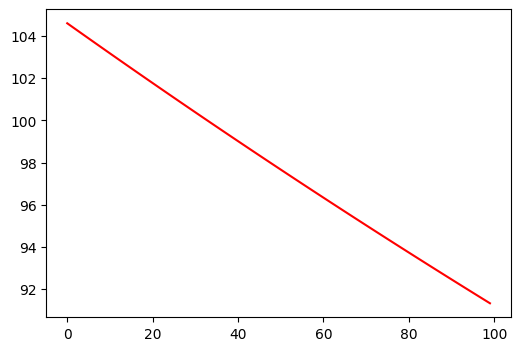

In [20]:
linear_model = LinearRegression(X_train, y_train, num_epochs = 10000, learning_rate = 0.00002)
linear_model.fit()
x_axis = list(range(100))
# linear_model.losses
plt.plot(x_axis,linear_model.losses[:100], color="r")
plt.show()

In [21]:
y_predict = linear_model.predict(X_test)
y_predict
print(compute_R2score(y_predict, y_test))

0.7601011501449425


In [22]:
print(np.random.randn(4,1))
# X_b.dot(theta)
# linear_model.theta[-1]
np.random.randn(X_b.shape[1])

[[-0.69321757]
 [-0.43233522]
 [-0.82486601]
 [-2.06507929]]


array([-1.67948483,  0.20760102,  0.39442076, -1.09625328, -0.24437509])

[12.15241544 14.02563227 10.13686196  3.63113926]


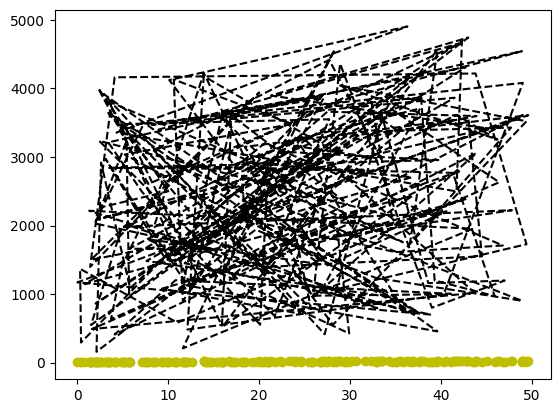

In [ ]:
print(linear_model.theta)
plt.plot(x2, y, 'yo', x2, linear_model.theta[1]*x1 + linear_model.theta[2]*x2 + linear_model.theta[3]*x3 + linear_model.theta[0], '--k')
plt.show()

In [23]:
#Polynomial Regression

def create_polynomial_features(X, degrees=2):
  x_b = X
  for i in range(2, degrees+1):
    X = np.c_(X, np.power(x_b, i))
  return X